Q13 and Q15 are subjective answer type questions, Answer them briefly. 
13. Explain the term regularization? 

When we use regression model to test some data,there is a good chance that model will overfit the given training dataset.
Regularisation help us to solve this overfiting problem by restricting the degrees of a given equation i.e simply reducing the number of degrees of a polynomial function by reducing their corresponding weights.
In a linear equation we do not want huge weights/coeffcients as a small change in weight can make a large difference for the independent variable (Y).
So regularization constraints the weights of such features to avoid overfitting.
 To regularize the model a shrinkage penalty is added to the cost function.



Example : Suppose we have got 70 question and answers for training purpose and we go over and agian many times.
Hence, we are too much aware about each and every 70 questions ,and we are too perfect that whatever questions will be asked  the answers will be correct.
Now if we conduct a test of 30 questions and out of this 20 questions are from training data and 10 questions are new.
It is possible out of 10 questions 5 can be correct and 5 can be wrong.But we should note that everytime we cannot have same data in test because data keeps changing each and every second.
So if we trust such data, then we are in big trouble because my model has already seen such data and giving good accuracy.

Now question is how do we know or check that the 20 questions were already in the training, we cannot check one by one as we may have billions and billions of data.

This concept is called overfitting as in training data we have observations, same observations are coming in test.
Second is that if we are giving too many features and some of features are not needed, the model can be overfitted model.
 
 So REGULARIZATION comes into picture.
 



In [1]:
#Types of Regularization
#Which particular algorithms are used for regularization?

LASSO(Least Absolute Shrinkage and Selection Operator)(L1 Form)
RIDGE Regression (L2 Form)
ELASTICNET(Less Popular)

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.drop(['Serial No.'],axis=1,inplace=True)

In [6]:
data.head(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
# Universal Rating is a categorical data, so need not to check anything
# If Universal Rating is Null, you cannot fill with mean as decimals can come, so use mode
# mode means data which occurs more frequently

GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


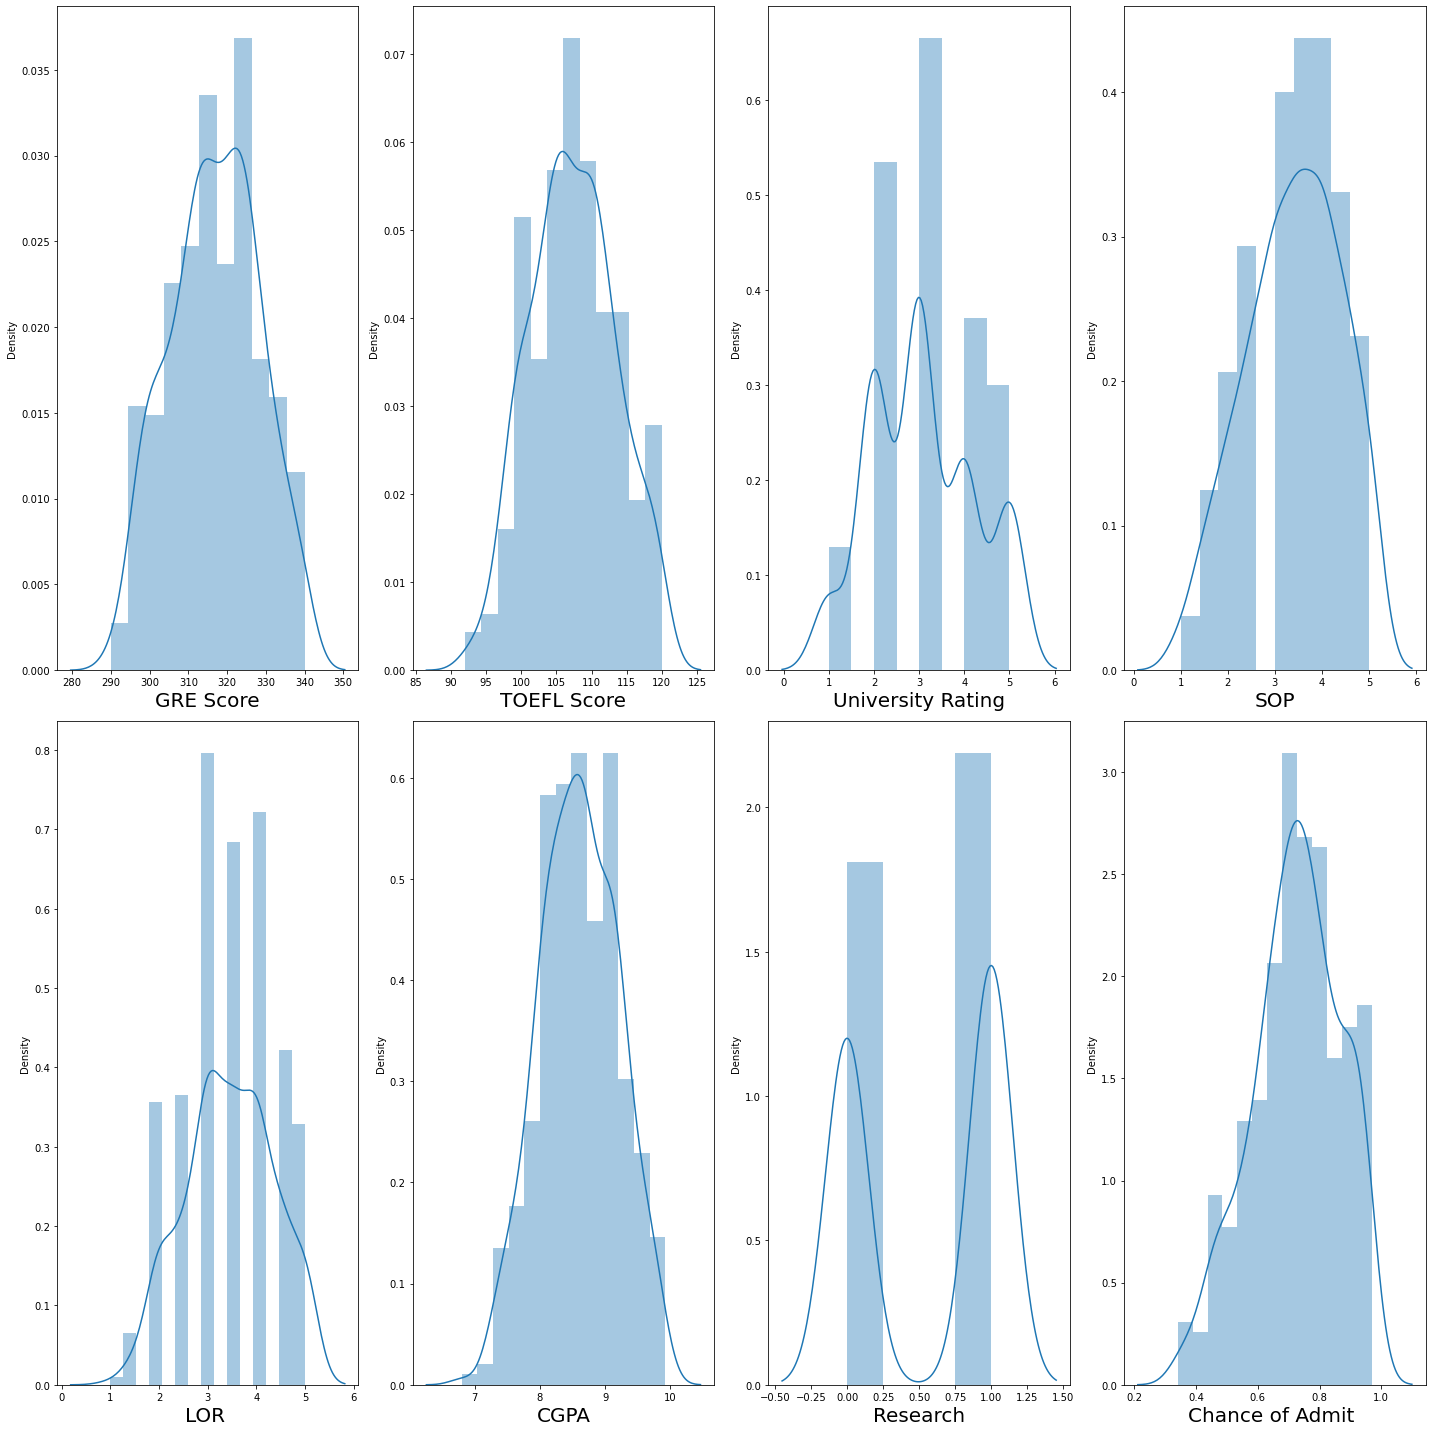

In [12]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)        
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1   
    
plt.tight_layout()

In [13]:
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [14]:
#Divide dataset into features and labels
#Research is fine as it is categorical data
#Keep all features in x and label in y , so in x we will not have Chance of columns



In [15]:
y=data['Chance of Admit ']
y
X=data.drop(columns=['Chance of Admit '])
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [16]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research


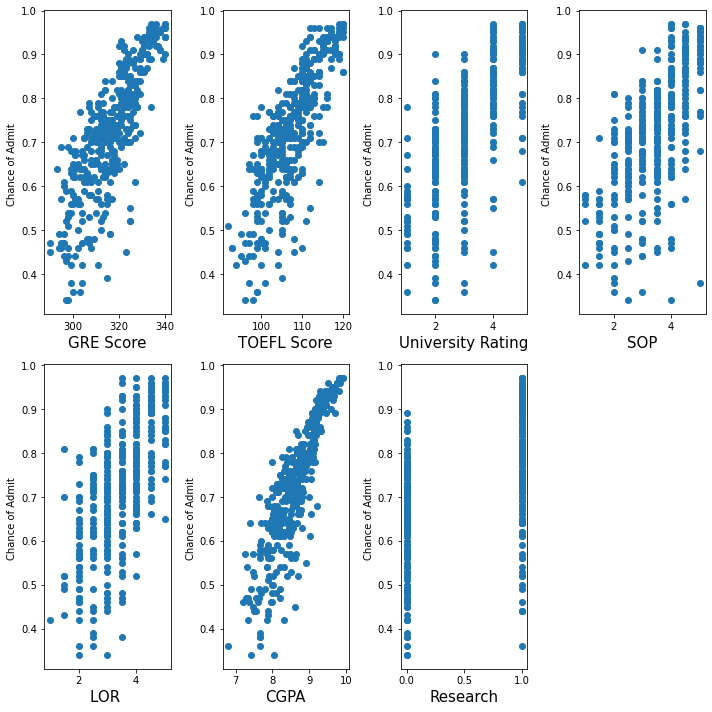

In [17]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in X:
    print(column)
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)        
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=15)
        plt.ylabel('Chance of Admit ',fontsize=10)
        
    plotnumber+=1   
    
plt.tight_layout()

If University rating is more, Chance of Admission is more though Universirt rating is Categorical data

In [18]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Train Test Split

In [19]:
# Split data into train and test in the same order
# X_Scaled is feature
# y is our label
# random_state : you can give any number you want, it has its own way of picking the number in randomn order
# if you run multiple times index number will not chance until you change random_state

x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=50)
y_train.head()

203    0.97
264    0.75
338    0.81
261    0.71
216    0.91
Name: Chance of Admit , dtype: float64

# Model instantiating and training

In [20]:
regression= LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [21]:
#Predict the chance of admission now
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [22]:
# Since you have already fit the scaler, you can now predict the data.
# Pass your data and check the prediction
print('Chance of Admission',regression.predict(scaler.transform([[323,105,5,4,4,8.98,1]])))

Chance of Admission [0.80341333]


To save the data, we use Pickle, because we will have to run each and every line of code again and again ANd it will be time consuming as real time analysis has millions of data to train

In [25]:
filename='finalised model pickle'
pickle.dump(regression,open(filename,'wb')) #to save we use pickle.dump() wb is to write

#prediction using the saved model
loaded_model=pickle.load(open(filename,'rb'))
a=loaded_model.predict(scaler.transform([[314,103,5,4,4,8.98,1]]))
a

array([0.77890015])

In [26]:
# Adjusted R Square
# We check how well the model understands the data or how well the model is trained
regression.score(x_train,y_train)

0.8193370700006861

In [27]:
#Lets Plot and Visulaise
y_pred=regression.predict(x_test)
y_pred

array([0.6678534 , 0.63611644, 0.73049292, 0.9148293 , 0.66191167,
       0.76863249, 0.67616722, 0.84836855, 0.83614136, 0.79808329,
       0.48163157, 0.66801071, 0.69045077, 0.61882777, 0.53266559,
       0.57702942, 0.49605994, 0.82251421, 0.62627602, 0.70334045,
       0.96277214, 0.85834459, 0.8569492 , 0.90191233, 0.62239436,
       0.69945711, 0.64078281, 0.89811577, 0.80135423, 0.75595174,
       0.90832009, 0.83793159, 0.59662533, 0.72800044, 0.71799946,
       0.60554994, 0.59734132, 0.7097765 , 0.78466267, 0.69881297,
       0.93290952, 0.66240843, 0.95170432, 0.69955181, 0.68816545,
       0.64630806, 0.65283471, 0.88150026, 0.95155753, 0.52089375,
       0.46480135, 0.54677445, 0.78995803, 0.72388375, 0.66277383,
       0.6558763 , 0.93454395, 0.74090541, 0.88007697, 0.9496488 ,
       0.67526856, 0.76200373, 0.80585476, 0.85660517, 0.52342601,
       0.70112992, 0.90097591, 0.72398081, 0.72027729, 0.73909227,
       0.76387935, 0.74063076, 0.733406  , 0.82460298, 0.66123

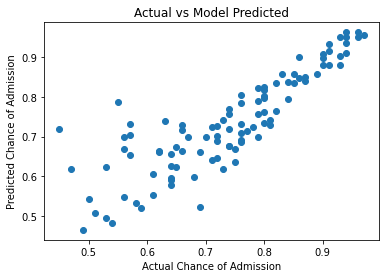

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission')
plt.title('Actual vs Model Predicted')
plt.show()

<BarContainer object of 100 artists>

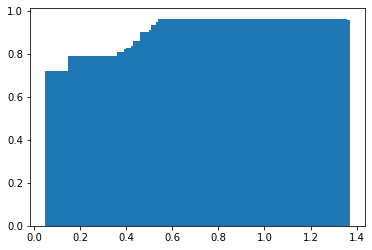

In [29]:
plt.bar(y_test,y_pred)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [31]:
y_pred=regression.predict(x_test)

In [32]:
mean_absolute_error(y_test,y_pred)

0.04764888825493136

In [33]:
mean_squared_error(y_test,y_pred)

0.004526319242200031

In [34]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06727792537080815

In [44]:
#Find the learning rate and give it to our model
#Example : Steps that it takes for learning correct rates in prediction
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

# Lasso Regularisation

Eleminates the features which are not needed.So it is one of the feature selection techniques.

Example : Height is not related with chances of admission


max_iter depends on how big data is in dataset, you need to check how many time syou want to iterate your data.

Lasso Regression adds “absolute value of magnitude” of coefficient as penalty term to the loss function(L).

In [36]:

lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [37]:
# best alpha parameter
alpha=lasscv.alpha_
alpha

6.963232972246015e-05

In [38]:
# now that we have best parameter, Let's use Lasso Regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=6.963232972246015e-05)

In [39]:
lasso_reg.score(x_test,y_test)

0.7311081673543406

# Using Ridge Regression model

L2 Form

Ridge Regression doesnot kill the unnecessary features which are not needed but it will give very very less importance.

Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function(L). 

In [40]:
# CV is cross Validation

ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [41]:
ridgecv.alpha_

0.020999999999999998

In [42]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.020999999999999998)

In [43]:
ridge_model.score(x_test,y_test)

0.7310768137801036